# Machine Learning Capstone Project

Fist we have to import the dependecies needed for the project as specified by the [README](https://github.com/jeyvison/machine_learning_project/blob/master/README.md) file

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from IPython.display import display 
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
import visuals as vs
from sklearn.metrics import f1_score

# Pretty display for notebooks
%matplotlib inline

print 'Dependencies succefully imported'

Dependencies succefully imported


In [77]:
#Loading the trainning data
data = pd.read_csv('data.csv')

#Removing unnecessary id column
data.drop(['id','Unnamed: 32'],1,inplace=True)

X = data.drop('diagnosis',1)
y = data.drop(X,1)

print 'Dataset succefully loaded. {0} points and {1} features'.format(*X.shape)

Dataset succefully loaded. 569 points and 30 features


Since we are in a high dimensional feature space we must check which features have more importance on this dataset so we can performe a feature reduction.

In [78]:
#First, we scale the dataset with the log function
X = np.log(X)

#We had some 0 values in our dataset that were turned to 'inf'
#Now we have to change it back
X[np.isinf(X)] = 0.0

display(X.describe())

/home/jeyvison/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,2.619131,2.935269,4.489174,6.363185,-2.350210,-2.380518,-2.777267,-3.237934,-1.719430,-2.773718,...,2.749578,3.217009,4.631289,6.615811,-2.037005,-1.550372,-1.592779,-2.266666,-1.258202,-2.497773
std,0.238189,0.220789,0.251084,0.483139,0.145572,0.494459,1.145741,0.981372,0.148229,0.106867,...,0.276438,0.240730,0.290892,0.554917,0.173086,0.617256,1.001406,0.723568,0.200010,0.195784
min,1.943192,2.273156,3.779405,4.966335,-2.944469,-3.943514,-7.275925,-6.291489,-2.244316,-2.996533,...,2.070653,2.486572,3.920190,5.221436,-2.642684,-3.601235,-6.295276,-4.736190,-1.854699,-2.899695
25%,2.459589,2.783158,4.319752,6.040969,-2.449115,-2.734600,-3.462222,-3.859905,-1.820776,-2.852498,...,2.565718,3.048325,4.432125,6.244749,-2.149006,-1.915963,-2.085862,-2.703660,-1.384696,-2.638617
50%,2.593013,2.935982,4.457134,6.311916,-2.344762,-2.379142,-2.708450,-3.296837,-1.719253,-2.788068,...,2.706048,3.235143,4.581492,6.531606,-2.030270,-1.551641,-1.421714,-2.256656,-1.265139,-2.525229
75%,2.758743,3.081910,4.645352,6.662749,-2.250942,-2.037149,-1.976885,-2.543765,-1.631172,-2.716284,...,2.933325,3.391820,4.831509,6.988413,-1.924149,-1.081460,-0.922309,-1.767262,-1.146018,-2.385098
max,3.336125,3.670715,5.239098,7.824446,-1.811554,-1.063052,0.000000,0.000000,-1.190728,-2.328518,...,3.584629,3.902780,5.526249,8.355615,-1.502379,0.056380,0.224742,0.000000,-0.409774,-1.572624


Now that we scaled the data lets analyze it

In [79]:
svc = SVC(kernel="linear",random_state=52)

stratifiedKFold = StratifiedKFold(n_splits=10,shuffle=True,random_state=30)

rfecv = RFECV(estimator=svc, step=1, cv=stratifiedKFold,
              scoring='accuracy',verbose=False)

new_X = rfecv.fit_transform(X,y)

print 'Features selected'

Features selected


Now that we have

Optimal number of features : 30


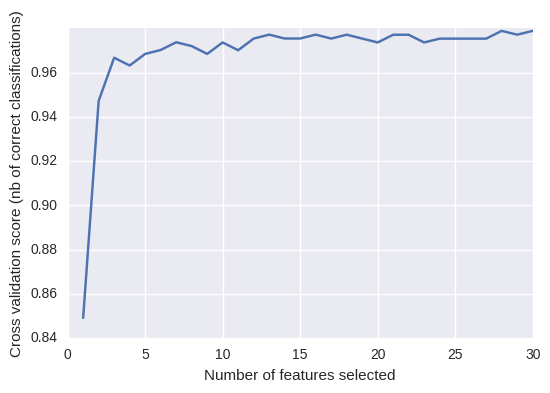

Max score found:0.978852303172


In [80]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

print 'Max score found:' +  str(max(rfecv.grid_scores_))


Now we reduced our data we must find the best score for the possible component numbers.

In [90]:
#We have to reshape y so we can use StratifiedKFold
c,r = y.values.shape
new_y = y.values.reshape(c,)

for train_index,test_index in stratifiedKFold.split(new_X, new_y):
    X_train, X_test = new_X[train_index], new_X[test_index]
    y_train, y_test = new_y[train_index], new_y[test_index]    
    
    svc.fit(X_train,y_train)






0.98242530755711777